# Titanic ML Project

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

# EDA Steps

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Drop Unnecessary Columns

In [6]:
df.drop(['PassengerId','Name','Fare','Ticket','Cabin','Parch'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [7]:
df.shape

(891, 6)

## Check Null Values

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Embarked      2
dtype: int64

In [9]:
## How many %age null values present in each columns
df.isna().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Embarked     0.224467
dtype: float64

In [10]:
## Total how many are null values
df.isna().sum().sum()

179

## Check data types of columns are good or not

In [11]:
df.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
df.select_dtypes(include='number').columns

Index(['Survived', 'Pclass', 'Age', 'SibSp'], dtype='object')

## Plot distribution of numerical columns

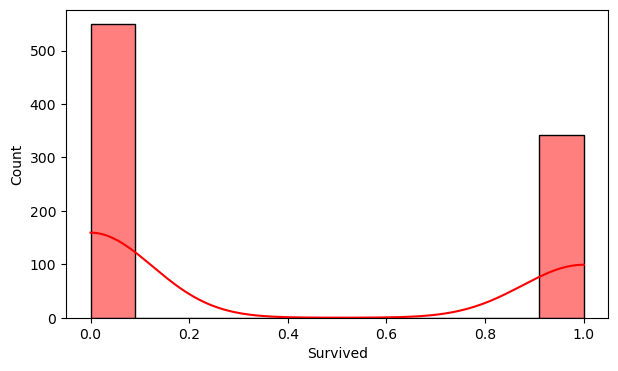

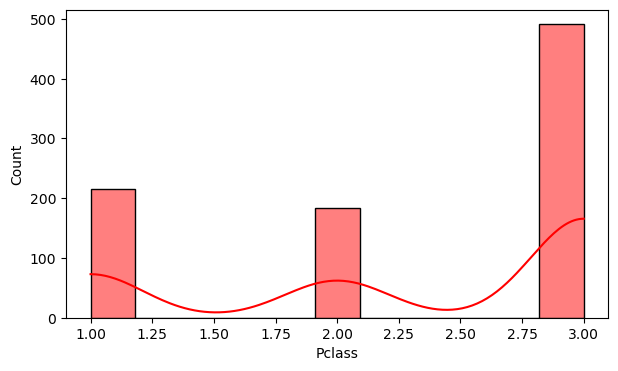

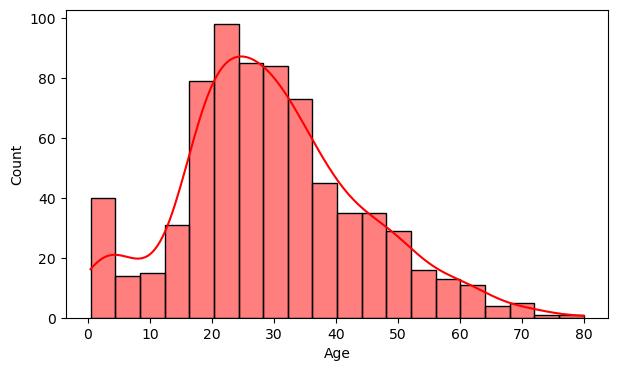

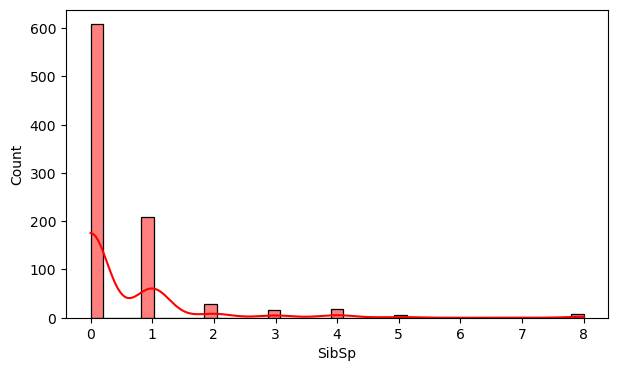

In [13]:
num_cols= df.select_dtypes(include='number').columns
for i in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i],color='red',kde=True)
    plt.show()

In [14]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

# Summarize & Visualize Data

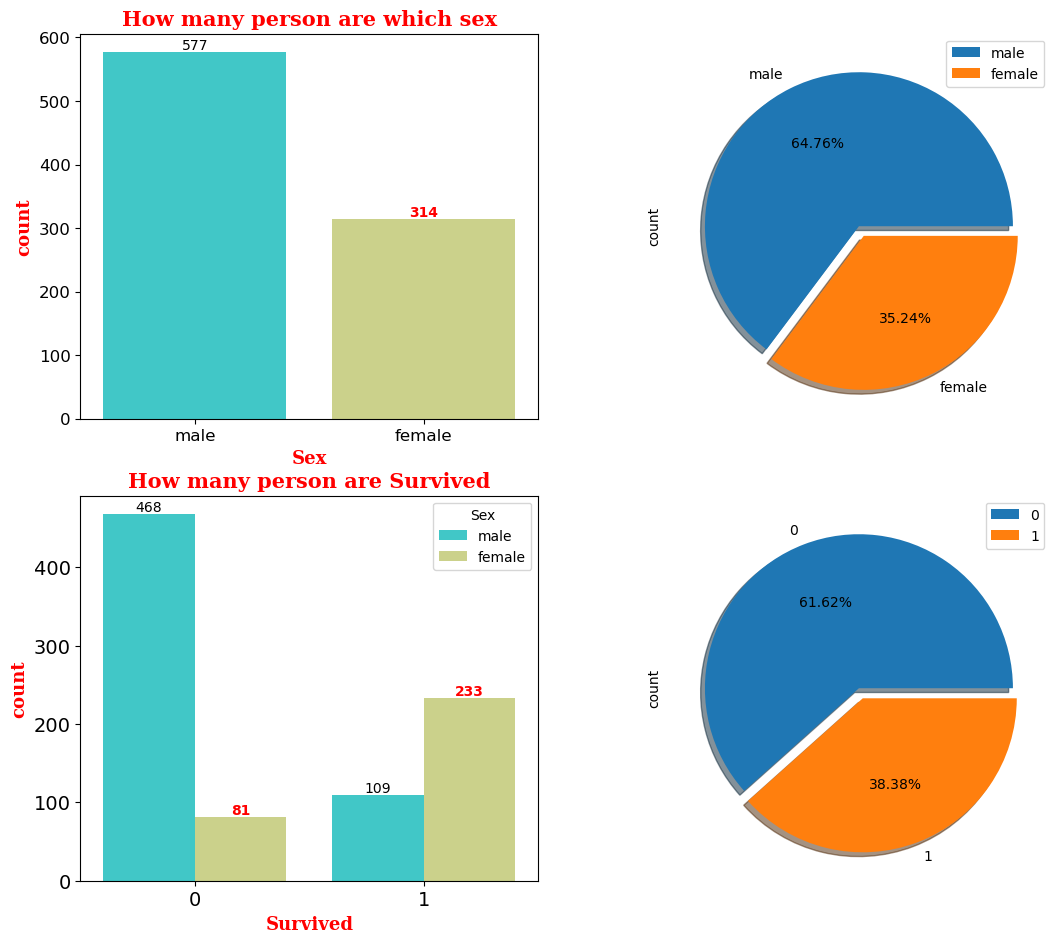

In [18]:
plt.figure(figsize=(13,11))
plt.subplot(2,2,1)
ax=sns.countplot(data=df,x='Sex',palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1],color='red',weight='bold')
plt.title('How many person are which sex',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.xlabel('Sex',fontdict={
    'fontsize': 13,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.ylabel('count',fontdict={
    'fontsize': 13,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,color='Black')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12,color='black')

plt.subplot(2,2,2)
df['Sex'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.legend(loc='upper right')

plt.subplot(2,2,3)
ax=sns.countplot(data=df,x='Survived',hue='Sex',palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1],color='red',weight='bold')
plt.title('How many person are Survived',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.xlabel('Survived',fontdict={
    'fontsize': 13,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
plt.ylabel('count',fontdict={
    'fontsize': 13,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14,color='Black')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14,color='black')

plt.subplot(2,2,4)
df['Survived'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.legend(loc='upper right')

plt.show()

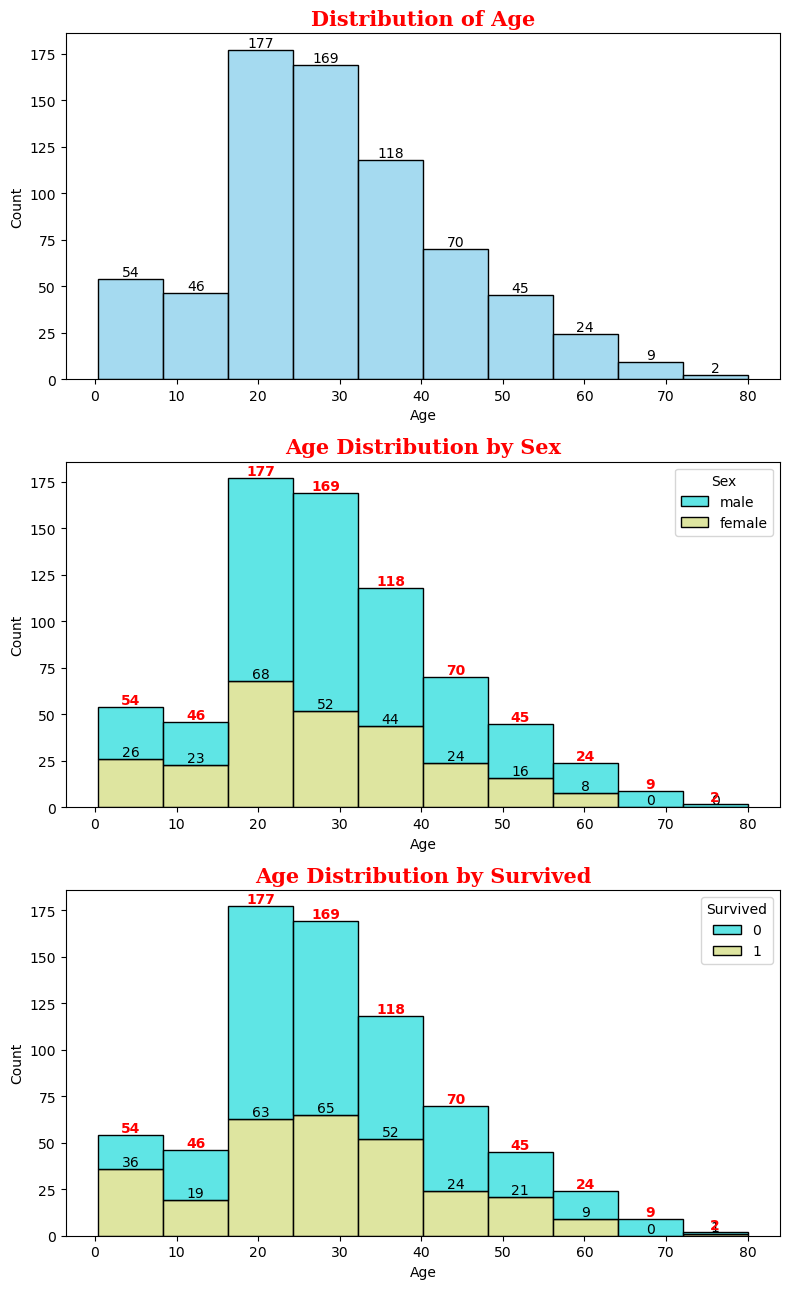

In [19]:
plt.figure(figsize=(8, 13))
plt.subplot(3, 1, 1)
ax=sns.histplot(data=df, x='Age', bins=10, color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Age',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(3, 1, 2)
ax=sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', palette='rainbow', bins=10)
ax.bar_label(ax.containers[0],fontsize=10)
ax.bar_label(ax.containers[1],color='red',fontsize=10,weight='bold')
plt.title('Age Distribution by Sex',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})


plt.subplot(3, 1, 3)
ax=sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='rainbow', bins=10)
ax.bar_label(ax.containers[0],fontsize=10)
ax.bar_label(ax.containers[1],color='red',fontsize=10,weight='bold')
plt.title('Age Distribution by Survived',fontdict={
    'fontsize': 15,
    'color': 'red',
    'weight': 'bold',
    'family': 'serif'})

plt.tight_layout()
plt.show()


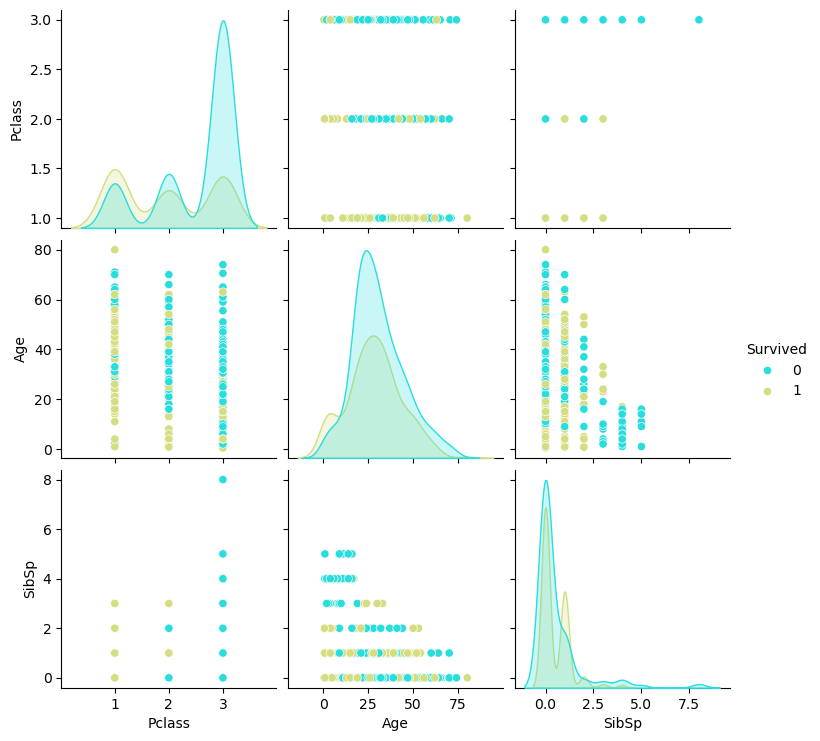

In [20]:
sns.pairplot(data=df,hue='Survived',palette='rainbow')
plt.show()

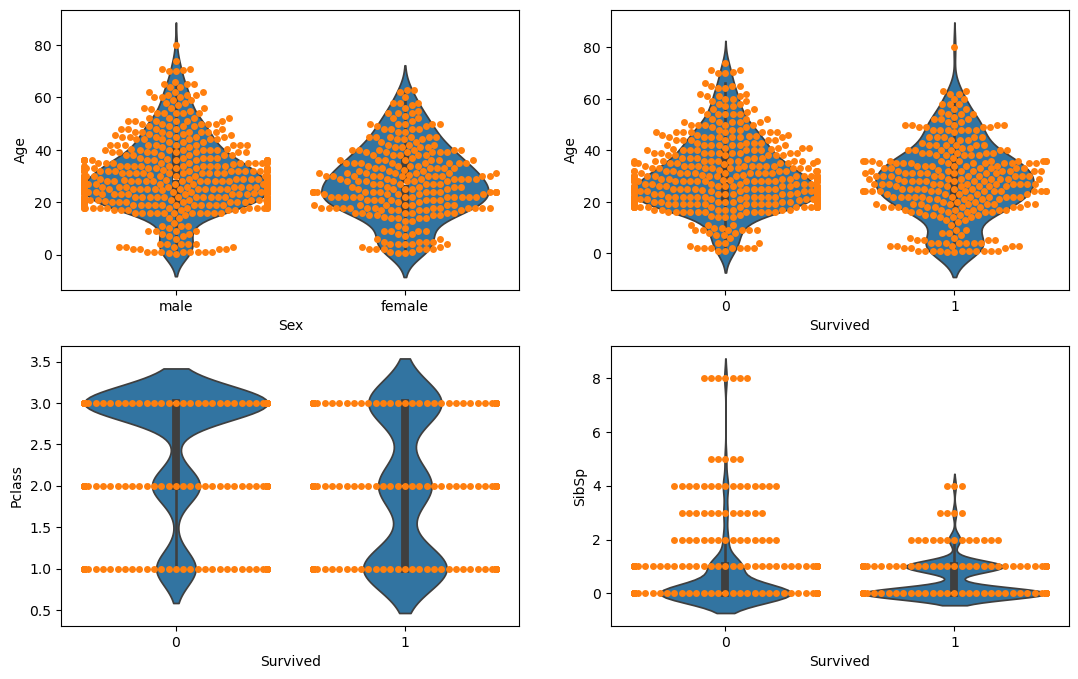

In [21]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(x='Sex',y='Age',data=df)
sns.swarmplot(x='Sex',y='Age',data=df)


plt.subplot(2,2,2)
sns.violinplot(x='Survived',y='Age',data=df)
sns.swarmplot(x='Survived',y='Age',data=df)


plt.subplot(2,2,3)
sns.violinplot(x='Survived',y='Pclass',data=df)
sns.swarmplot(x='Survived',y='Pclass',data=df)


plt.subplot(2,2,4)
sns.violinplot(x='Survived',y='SibSp',data=df)
sns.swarmplot(x='Survived',y='SibSp',data=df)

plt.show()

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008
std,0.486592,0.836071,14.526497,1.102743
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000


## Play with Outliers

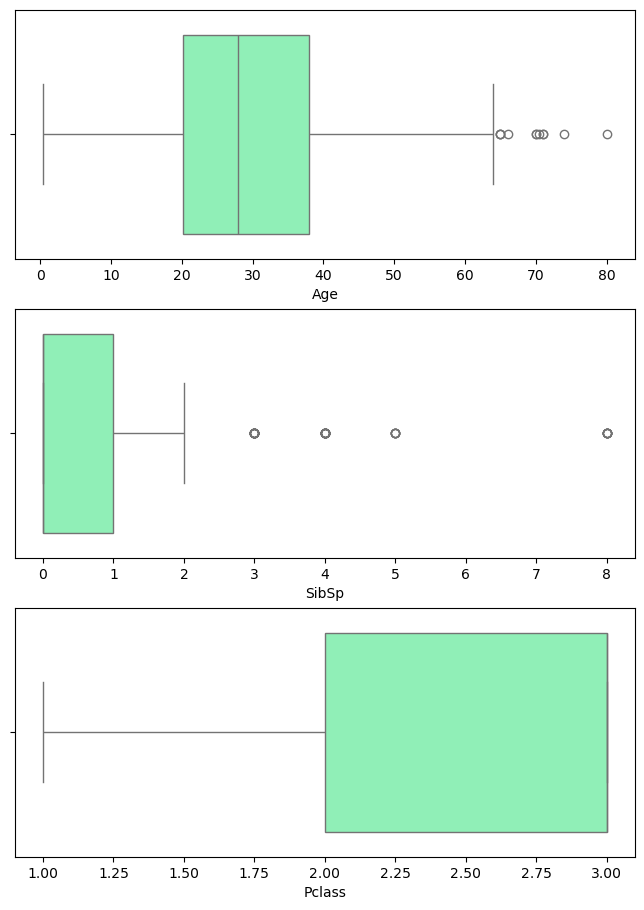

In [23]:
plt.figure(figsize=(8,11))
plt.subplot(3,1,1)
sns.boxplot(x='Age',data=df,palette='rainbow')

plt.subplot(3,1,2)
sns.boxplot(x='SibSp',data=df,palette='rainbow')

plt.subplot(3,1,3)
sns.boxplot(x='Pclass',data=df,palette='rainbow')

plt.show()

## We are Capping the Outliers

In [24]:
col_num = ['Survived', 'Pclass', 'Age', 'SibSp']  # just column names

for col in col_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap the outliers using np.where
    df[col] = np.where(
        df[col] > upper_limit, upper_limit,
        np.where(df[col] < lower_limit, lower_limit, df[col])
    )

In [25]:
df.shape

(891, 6)

In [26]:
df.describe()

,Survived,Pclass,Age,SibSp
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.622700,0.426487
std,0.486592,0.836071,14.316665,0.708246
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000
max,1.000000,3.000000,64.812500,2.500000


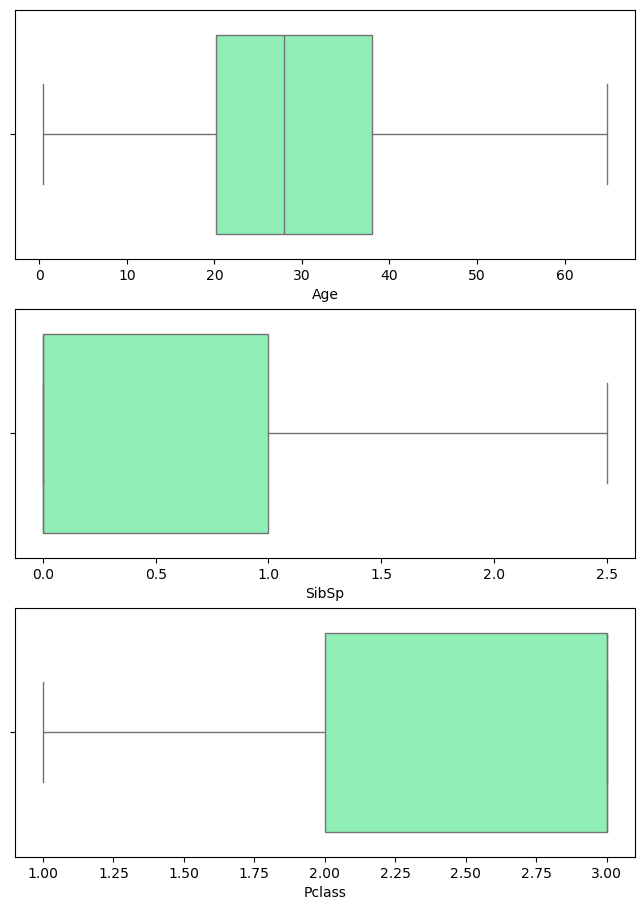

In [27]:
plt.figure(figsize=(8,11))
plt.subplot(3,1,1)
sns.boxplot(x='Age',data=df,palette='rainbow')

plt.subplot(3,1,2)
sns.boxplot(x='SibSp',data=df,palette='rainbow')

plt.subplot(3,1,3)
sns.boxplot(x='Pclass',data=df,palette='rainbow')

plt.show()

In [28]:
bins = [0, 12, 18, 35, 50, 60]  
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Age_Group
0,0.0,3.0,male,22.0,1.0,S,Young Adult
1,1.0,1.0,female,38.0,1.0,C,Adult
2,1.0,3.0,female,26.0,0.0,S,Young Adult
3,1.0,1.0,female,35.0,1.0,S,Young Adult
4,0.0,3.0,male,35.0,0.0,S,Young Adult


## Handling Missing values

In [29]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Embarked       2
Age_Group    199
dtype: int64

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age_Group'] = df['Age_Group'].fillna(df['Age_Group'].mode()[0])

In [31]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Embarked     0
Age_Group    0
dtype: int64

# Feature Engeering

### Create a Age Group Columns

In [32]:
## Encoding using map
df['Age_Group'] = df['Age_Group'].map({
    'Child': 0,
    'Teen': 1,
    'Young Adult': 2,
    'Adult': 3,
    'Senior': 4
})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Age_Group
0,0.0,3.0,male,22.0,1.0,S,2
1,1.0,1.0,female,38.0,1.0,C,3
2,1.0,3.0,female,26.0,0.0,S,2
3,1.0,1.0,female,35.0,1.0,S,2
4,0.0,3.0,male,35.0,0.0,S,2


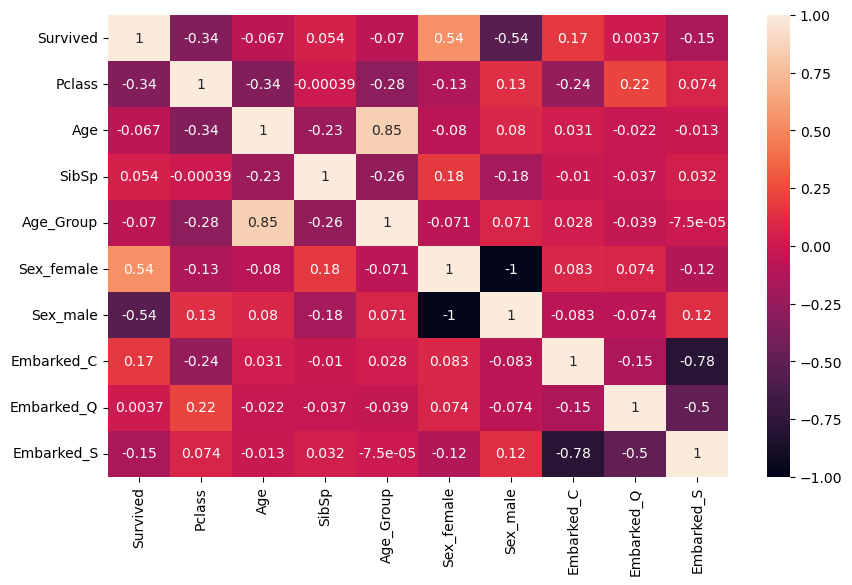

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [34]:
# 1.) One Hot Encoding
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

df= pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=False)
df=df.astype(int)
df.head()

,Survived,Pclass,Age,SibSp,Age_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,2,0,1,0,0,1
1,1,1,38,1,3,1,0,1,0,0
2,1,3,26,0,2,1,0,0,0,1
3,1,1,35,1,2,1,0,0,0,1
4,0,3,35,0,2,0,1,0,0,1


In [37]:
## take input & output variable
x= df.drop(['Survived'],axis=1)
y= df['Survived']

In [38]:
x.head()

,Pclass,Age,SibSp,Age_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,2,0,1,0,0,1
1,1,38,1,3,1,0,1,0,0
2,3,26,0,2,1,0,0,0,1
3,1,35,1,2,1,0,0,0,1
4,3,35,0,2,0,1,0,0,1


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [40]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaling= StandardScaler()
scaling.fit(x)
x_scaled=pd.DataFrame(scaling.transform(x),columns=x.columns)
x_scaled.head()

,Pclass,Age,SibSp,Age_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.584212,0.940313,-0.037645,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.666505,0.940313,1.118956,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.271533,-0.628636,-0.037645,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.431996,0.940313,-0.037645,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.431996,-0.628636,-0.037645,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [41]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 9), (179, 9), (712,), (179,))

##  Build a Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [43]:
models= {
    'Logistic Regression':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naie Bayes':BernoulliNB(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier()
}

In [44]:
result= []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    acc= accuracy_score(y_test,y_pred)*100
    f1= f1_score(y_pred,y_test)*100
    result.append({
        'name':name,
        'Accuracy':round(acc,4),
        'F1_score':round(f1,4)
    })

In [45]:
result

[{'name': 'Logistic Regression', 'Accuracy': 80.4469, 'F1_score': 75.8621},
 {'name': 'KNN', 'Accuracy': 81.5642, 'F1_score': 76.5957},
 {'name': 'Naie Bayes', 'Accuracy': 78.2123, 'F1_score': 72.7273},
 {'name': 'Decision Tree', 'Accuracy': 77.095, 'F1_score': 70.922},
 {'name': 'SVM', 'Accuracy': 81.5642, 'F1_score': 75.5556},
 {'name': 'Random Forest', 'Accuracy': 78.7709, 'F1_score': 73.2394}]

# K-Fold Cross Validation

In [46]:
x.head()

,Pclass,Age,SibSp,Age_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,2,0,1,0,0,1
1,1,38,1,3,1,0,1,0,0
2,3,26,0,2,1,0,0,0,1
3,1,35,1,2,1,0,0,0,1
4,3,35,0,2,0,1,0,0,1


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [48]:
## Feature Scaling
scaling1= StandardScaler()
scaling1.fit(x)
x_scaled1 = pd.DataFrame(scaling1.transform(x),columns=x.columns)
x_scaled1.head()

,Pclass,Age,SibSp,Age_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.584212,0.940313,-0.037645,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.666505,0.940313,1.118956,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.271533,-0.628636,-0.037645,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.431996,0.940313,-0.037645,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.431996,-0.628636,-0.037645,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [49]:
## Use for Support Vector Classification
model_svc= SVC()
from sklearn.model_selection import cross_val_score
val_score= cross_val_score(model_svc,x_scaled1,y,cv=5,scoring='accuracy')

In [50]:
val_score

array([0.83240223, 0.83146067, 0.83146067, 0.79213483, 0.86516854])

In [51]:
## Find Average
print(val_score.mean()*100)

83.0525390747599


In [52]:
## Use for Knn

model_knn = KNeighborsClassifier()
knn_var_score = cross_val_score(model_knn, x_scaled1, y, cv=5, scoring='accuracy')

print("KNN Cross-validation scores:", knn_var_score)
print("Mean Accuracy:", knn_var_score.mean()*100)

KNN Cross-validation scores: [0.82681564 0.80337079 0.83707865 0.80337079 0.8258427 ]
Mean Accuracy: 81.9295712761283


## Grid search CV using cross validation

In [54]:
from sklearn.model_selection import GridSearchCV

In [61]:
model_svm = SVC()
param_grid = {
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] 
}
classifier = GridSearchCV(
    estimator=model_svm,
    param_grid=param_grid,
    cv=5,
    return_train_score=False)
classifier.fit(x_scaled1, y)

# Best results
print("Best Parameters:", classifier.best_params_)
print("Best Accuracy Score:", classifier.best_score_)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Accuracy Score: 0.830525390747599


####

# Random Search CV using cross validation

In [63]:
from sklearn.model_selection import RandomizedSearchCV
model_forest = RandomForestClassifier()
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy']}
classifier = GridSearchCV(
    estimator=model_forest,
    param_grid=param_dist,
    cv=5,
    return_train_score=False)
classifier.fit(x_scaled1, y)

# Best results
print("Best Parameters:", classifier.best_params_)
print("Best Accuracy Score:", classifier.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300}
Best Accuracy Score: 0.8316552633230808


####

# Ensemble Learning

- **Stacking**
- we need to do train test split in ensemble learning

In [79]:
# Base and Meta learners
Base_learner = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('forest', RandomForestClassifier(random_state=42)),
    ('logistic', LogisticRegression(max_iter=1000))
]

meta_learner = KNeighborsClassifier()   ## Meta learnere hum kisi ko bhi bana sakte hai

# Create the stacking classifier
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
    estimators=Base_learner,
    final_estimator=meta_learner,
    cv=5
)

In [80]:
# Fit and predict
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('forest',
                                RandomForestClassifier(random_state=42)),
                               ('logistic', LogisticRegression(max_iter=1000))],
                   final_estimator=KNeighborsClassifier())

In [81]:
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Stacking Classifier Accuracy: {accuracy:.2f}%")

Stacking Classifier Accuracy: 79.89%


####

- **Bagging**
- Bagging me hum koi ek hi model lete hai
- only random forest algorithm use in bagging


####

- **Boosting**
- XG Boost is very used in Boosting
- it`s work on weak model to convert strong model(generalized model)

In [94]:
## Ada Boost
from sklearn.ensemble import AdaBoostClassifier,
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME.R',  # or 'SAMME'
    random_state=33
)

In [95]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=33)

In [96]:
y_pred = ada_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"AdaBoost Accuracy: {accuracy:.2f}%")

AdaBoost Accuracy: 81.01%


####

In [103]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=1.0, 
    random_state=42
)

In [104]:
gradient_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [106]:
y_pred = gradient_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_gradient = accuracy_score(y_test, y_pred) * 100
print(f"GradientBoost Accuracy: {accuracy_gradient:.2f}%")

GradientBoost Accuracy: 81.01%


####

In [107]:
## XG Boost
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.9/150.0 MB 9.3 MB/s eta 0:00:16
   - -------------------------------------- 4.2/150.0 MB 7.9 MB/s eta 0:00:19
   - -------------------------------------- 6.3/150.0 MB 8.6 MB/s eta 0:00:17
   -- ------------------------------------- 8.7/150.0 MB 9.2 MB/s eta 0:00:16
   -- ------------------------------------- 10.7/150.0 MB 9.4 MB/s eta 0:00:15
   --- ------------------------------------ 13.1/150.0 MB 9.7 MB/s eta 0:00:15
   --- ------------------------------------ 14.7/150.0 MB 9.4 MB/s eta 0:00:15
   ---- ----------------------------------- 16.5/150.0 MB 9.3 MB/s eta 0:00:15
   ---- ----------------------------------- 18.4/150.0 MB 9.2 MB/s eta 0:00:15
   ----- ---------------------------------- 20.7/150.0 MB 9.3 MB/s eta 0:00:14
   ------ --------------------------------- 23.1/150.0 MB 9.5 MB/

In [108]:
import xgboost as xgb
from xgboost import XGBClassifier

In [109]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 82.12290502793296
